In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("cleaned_videogames_sales.csv")

# print(df.head())
df.columns

Index(['name', 'platform', 'year', 'genre', 'publisher', 'rank', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales'],
      dtype='object')

In [3]:
# Krijojm nje kopje per te mos ndryshuar asgje ne dataset e pastruar
df_analyze = df.copy()

EDA (Exploratory Analysis)


In [4]:
# Totali i lojrave
df_analyze.shape[0]

16291

In [5]:
# Numri i Platformave
df_analyze['platform'].nunique()


31

In [6]:
# Numri i Zhanreve
df_analyze['genre'].nunique()

12

In [7]:
# Numri i publikueseve
df_analyze['publisher'].nunique()

576

In [8]:
# Top 10 lojrat sipas Shitjeve Globale
df_analyze.groupby(['name'])["global_sales"].sum().sort_values(ascending=False).head(10)

name
Wii Sports                        82.74
Grand Theft Auto V                55.92
Super Mario Bros.                 45.31
Tetris                            35.84
Mario Kart Wii                    35.83
Wii Sports Resort                 33.00
Pokemon Red/Pokemon Blue          31.38
Call of Duty: Modern Warfare 3    30.84
New Super Mario Bros.             30.01
Call of Duty: Black Ops II        29.73
Name: global_sales, dtype: float64

In [9]:
# Top 10 Publikuesit sipas Shitjeve Globale
df_analyze.groupby('publisher')["global_sales"].sum().sort_values(ascending=False).head(10)

publisher
Nintendo                        1784.23
Electronic Arts                 1093.21
Activision                       721.07
Sony Computer Entertainment      607.27
Ubisoft                          473.33
Take-Two Interactive             399.45
Thq                              340.32
Konami Digital Entertainment     278.37
Sega                             270.68
Namco Bandai Games               253.47
Name: global_sales, dtype: float64

In [10]:
# Top 10 Platformat sipas Shitjeve Globale
df_analyze.groupby('platform')["global_sales"].sum().sort_values(ascending=False).head(10)

platform
PS2     1233.57
X360     969.30
PS3      949.39
Wii      909.20
DS       817.89
PS       727.56
GBA      304.99
PSP      291.66
PS4      278.16
GB       254.43
Name: global_sales, dtype: float64

In [11]:
# Tendencat me Kalimin e Kohës
yearly_stats = (
    df_analyze
    .groupby("year")
    .agg(
        Yearly_Total_Sales=("global_sales", "sum"),
        Yearly_Releases=("name", "count"),
        Average_Sales_Per_Game=("global_sales", "mean")
    )
    .reset_index()
)
yearly_stats["Average_Sales_Per_Game"] = yearly_stats["Average_Sales_Per_Game"].round(2)
yearly_stats_sorted = yearly_stats.sort_values(
    by="Yearly_Total_Sales",
    ascending=False
)

yearly_stats_sorted

,year,Yearly_Total_Sales,Yearly_Releases,Average_Sales_Per_Game
28,2008,678.50,1428,0.48
29,2009,667.10,1431,0.47
27,2007,609.23,1201,0.51
30,2010,600.20,1257,0.48
26,2006,520.52,1008,0.52
31,2011,515.74,1136,0.45
25,2005,457.97,936,0.49
24,2004,413.61,744,0.56
22,2002,394.97,829,0.48
33,2013,367.98,546,0.67


In [12]:
# Shitjet Totale sipas Zhanrit
genre_summary = (
    df_analyze
    .groupby('genre')
    .agg(
        Total_Sales=('global_sales', 'sum'),
        Total_Games=('name', 'count')
    )
    .sort_values(by='Total_Sales', ascending=False)
)

genre_summary

,Total_Sales,Total_Games
genre,,
Action,1721.82,3251
Sports,1308.84,2304
Shooter,1025.69,1282
Role-Playing,923.74,1470
Platform,828.80,875
Misc,789.28,1686
Racing,726.54,1225
Fighting,444.08,836
Simulation,389.70,848


In [13]:
df_analyze.columns

Index(['name', 'platform', 'year', 'genre', 'publisher', 'rank', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales'],
      dtype='object')

In [14]:
# Lista e rajoneve dhe kolonave të shitjeve
regions = {
    'NA': 'na_sales',
    'EU': 'eu_sales',
    'JP': 'jp_sales',
    'OTHER': 'other_sales'
}

# Lista për ruajtjen e rezultateve
data = []

for region_name, sales_col in regions.items():
    # Top 3 Zhanret
    top_genres = df_analyze.groupby('genre')[sales_col].sum().sort_values(ascending=False).head(3)
    top_genres_str = ', '.join(top_genres.index)
    
    # Top 3 Platformat
    top_platforms = df_analyze.groupby('platform')[sales_col].sum().sort_values(ascending=False).head(3)
    top_platforms_str = ', '.join(top_platforms.index)
    
    
    # Shto rreshtin në listë
    data.append({
        'Rajoni': region_name,
        'Top 3 Zhanret': top_genres_str,
        'Top 3 Platformat': top_platforms_str,
    })

# Krijo DataFrame tabelar
df_region_analysis = pd.DataFrame(data)

# Shfaq rezultatin
df_region_analysis

,Rajoni,Top 3 Zhanret,Top 3 Platformat
0,NA,"Action, Sports, Shooter","X360, PS2, Wii"
1,EU,"Action, Sports, Shooter","PS3, PS2, X360"
2,JP,"Role-Playing, Action, Sports","DS, PS, PS2"
3,OTHER,"Action, Sports, Shooter","PS2, PS3, X360"


In [15]:
# Përqendrimi i Tregut
total_global_sales = df_analyze['global_sales'].sum()
top5_publishers = df_analyze.groupby('publisher')['global_sales'].sum().sort_values(ascending=False).head(5).sum()
concentration = (top5_publishers / total_global_sales) * 100

df_market_concentration = pd.DataFrame({
    'Metrika': [
        'Shitjet Totale Globale',
        'Shitjet e Top 5 Publikuesve',
        'Përqendrimi (Top 5)'
    ],
    'Vlera': [
        f"{total_global_sales:.2f} milion",
        f"{top5_publishers:.2f} milion",
        f"{concentration:.2f}%"
    ]
})

df_market_concentration

,Metrika,Vlera
0,Shitjet Totale Globale,8807.53 milion
1,Shitjet e Top 5 Publikuesve,4679.11 milion
2,Përqendrimi (Top 5),53.13%


# Vizualizimi

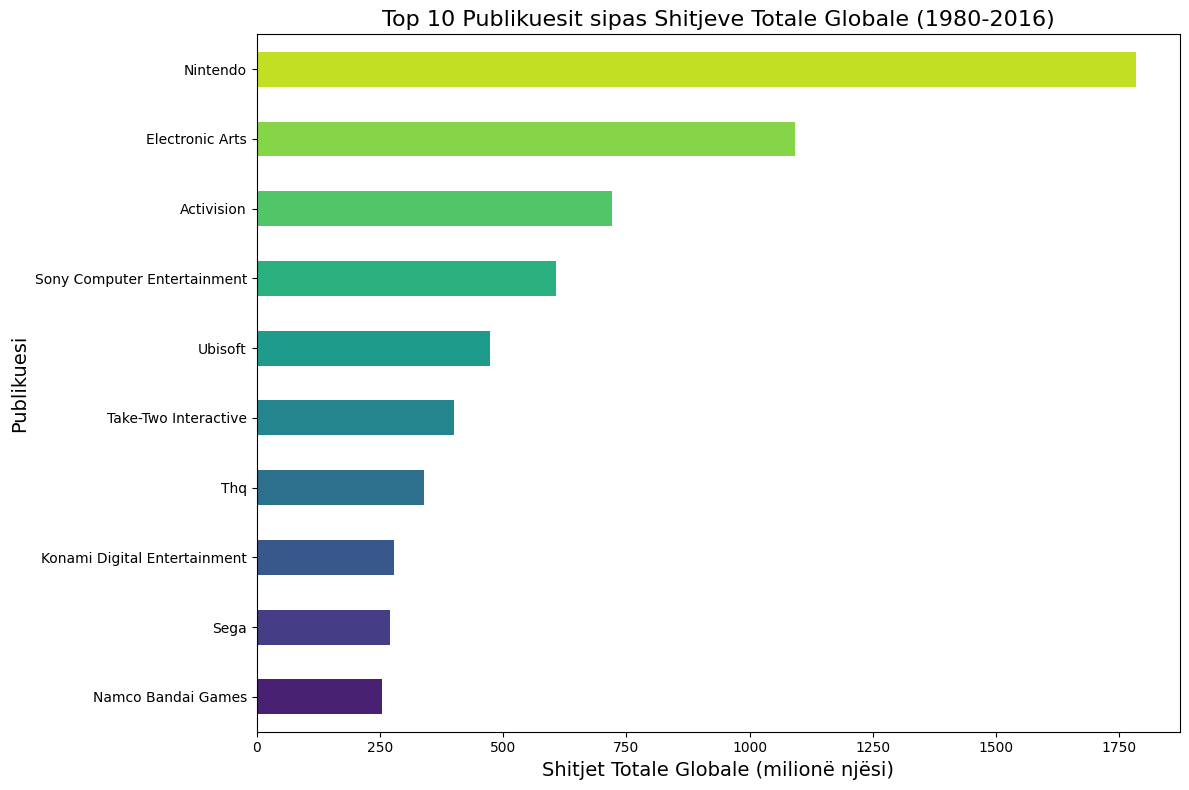

In [19]:
# 1. Bar chart — Top 10 Publikuesit sipas Shitjeve Globale
top_publishers = df.groupby('publisher')['global_sales'].sum().nlargest(10).sort_values(ascending=True)

plt.figure(figsize=(12, 8))

top_publishers.plot(kind='barh', color=sns.color_palette("viridis", 10))

plt.title('Top 10 Publikuesit sipas Shitjeve Totale Globale (1980-2016)', fontsize=16)

plt.xlabel('Shitjet Totale Globale (milionë njësi)', fontsize=14)
plt.ylabel('Publikuesi', fontsize=14)

plt.tight_layout()
plt.show()

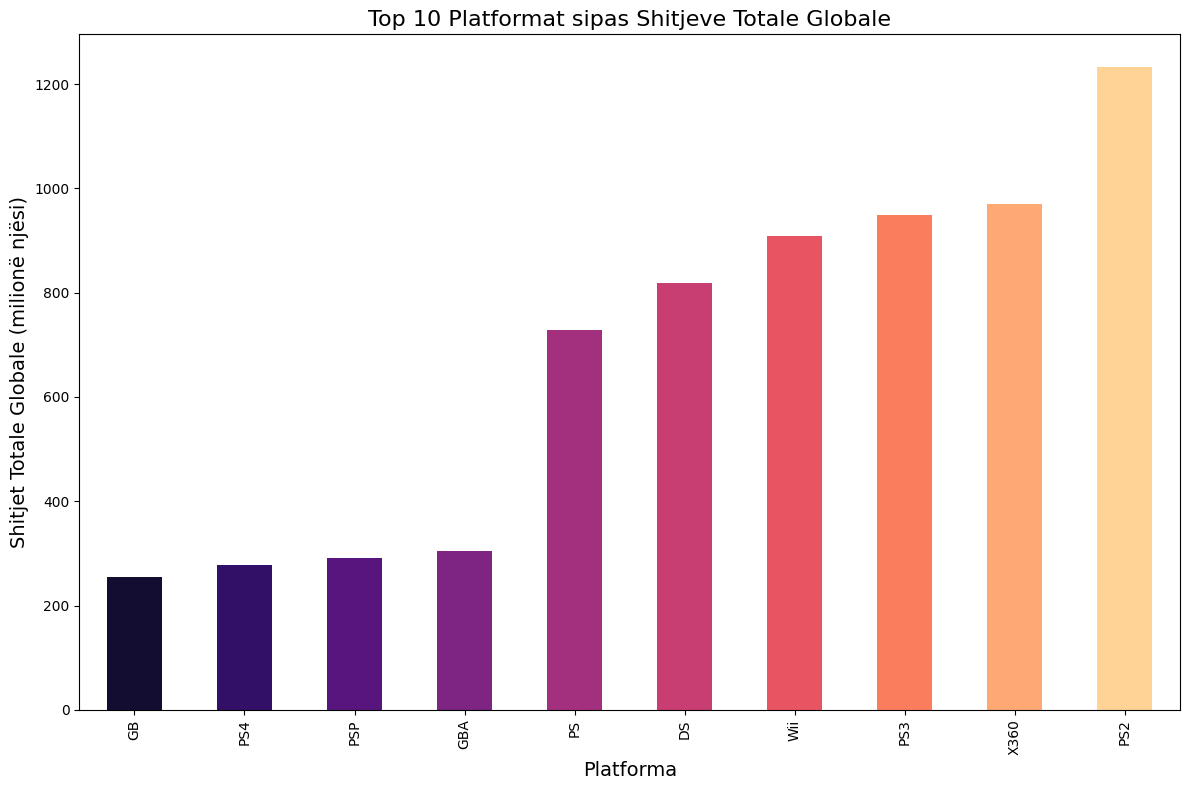

In [20]:
# 2. Bar chart - Top 10 Platformat sipas Shitjeve Globale

top_platforms = df.groupby('platform')['global_sales'].sum().nlargest(10).sort_values(ascending=True)

plt.figure(figsize=(12,8))

top_platforms.plot(kind='bar', color=sns.color_palette("magma", 10))

plt.title('Top 10 Platformat sipas Shitjeve Totale Globale', fontsize=16)

plt.xlabel('Platforma', fontsize=14)
plt.ylabel('Shitjet Totale Globale (milionë njësi)', fontsize=14)

plt.tight_layout()
plt.show()

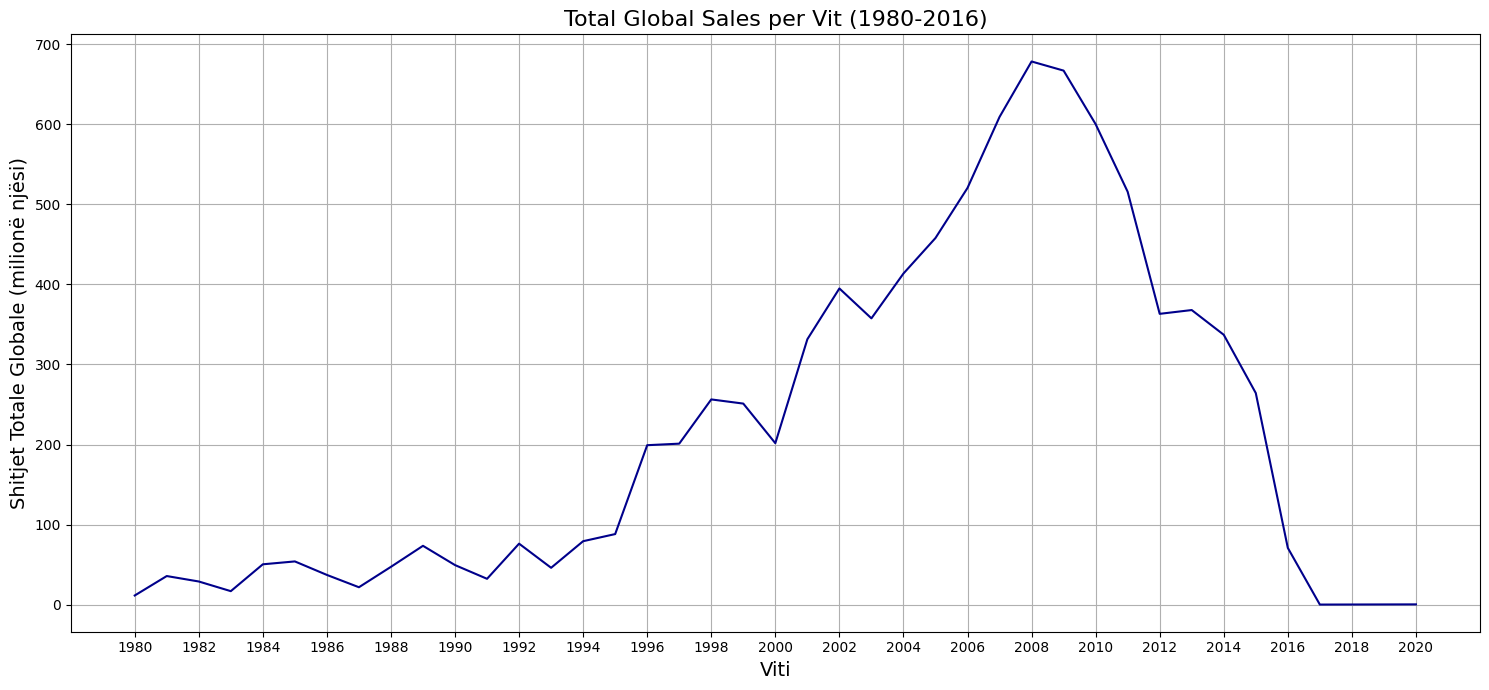

In [ ]:
# 3. Shitjet Totale Globale Vjetore

yearly_sales = df.groupby('year')['global_sales'].sum().reset_index()

plt.figure(figsize=(15,7))

sns.lineplot(data=yearly_sales, x='year', y='global_sales', markers='x', color='darkblue')

plt.title('Total Global Sales per Vit (1980-2016)', fontsize=16)
plt.xlabel('Viti', fontsize=14)
plt.ylabel('Shitjet Totale Globale (milionë njësi)', fontsize=14)

#Funksioni range(a, b, c) do të thotë: fillo nga a, shko deri tek b, ec me hap c
plt.xticks(ticks=range(int(yearly_sales['year'].min()),
                       int(yearly_sales['year'].max()) + 1,
                       2))


plt.grid(True)
plt.tight_layout()
plt.show()

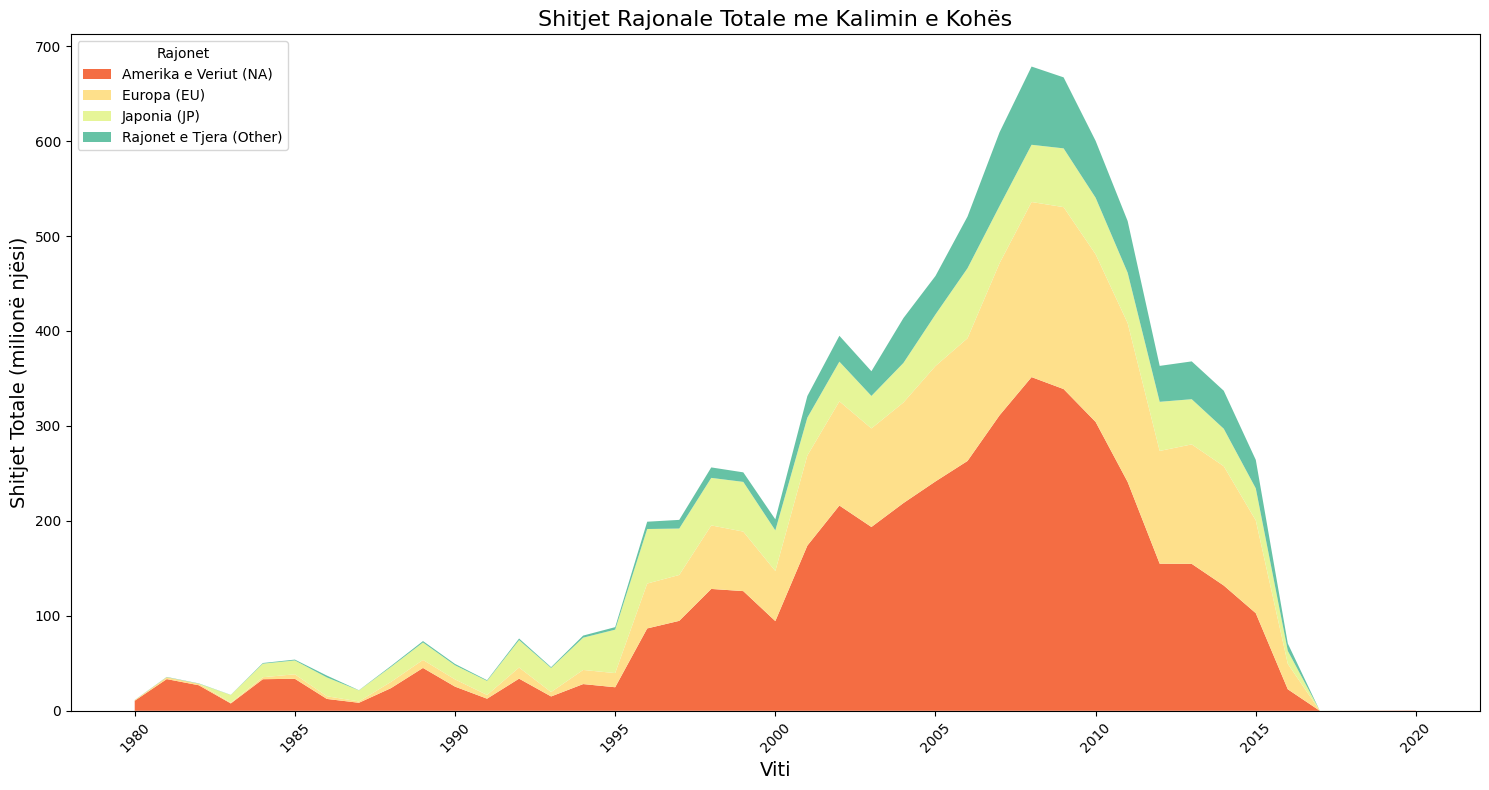

In [26]:
# 4. Stacked area chart — Shitjet Rajonale gjat viteve

region_cols = ["na_sales", "eu_sales", "jp_sales", "other_sales"]
yearly_regional_sales = df.groupby('year')[region_cols].sum().reset_index()

plt.figure(figsize=(15, 8))
plt.stackplot(
    yearly_regional_sales['year'],
    yearly_regional_sales['na_sales'],
    yearly_regional_sales['eu_sales'],
    yearly_regional_sales['jp_sales'],
    yearly_regional_sales['other_sales'],
    labels=['Amerika e Veriut (NA)', 'Europa (EU)', 'Japonia (JP)', 'Rajonet e Tjera (Other)'],
    colors=sns.color_palette("Spectral", 4)
)
plt.title('Shitjet Rajonale Totale me Kalimin e Kohës', fontsize=16)
plt.xlabel('Viti', fontsize=14)
plt.ylabel('Shitjet Totale (milionë njësi)', fontsize=14)
plt.legend(loc='upper left', title='Rajonet', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

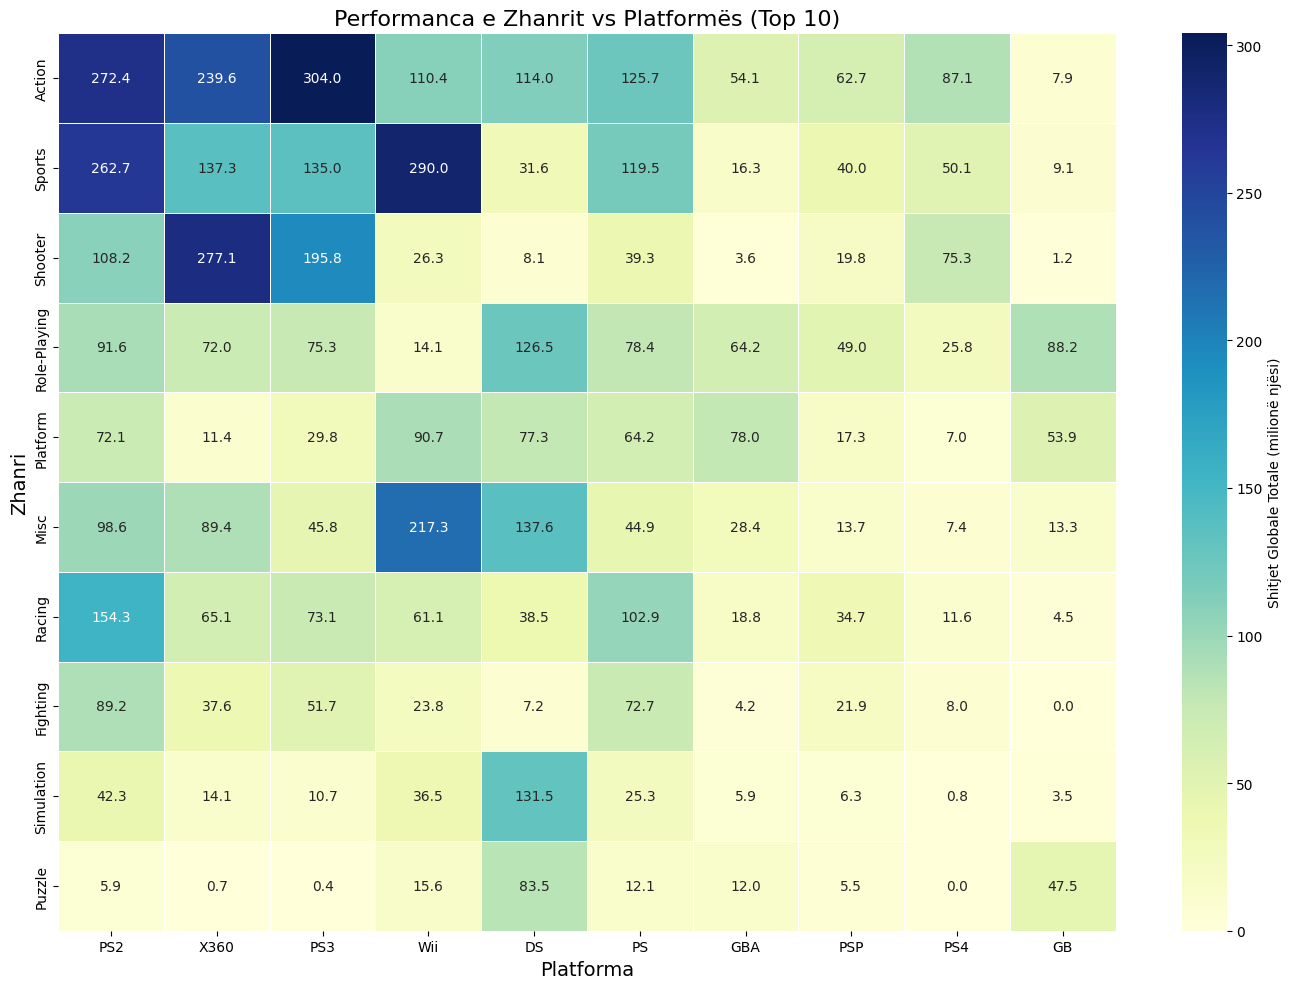

In [ ]:
# 5. Top 10 platformat dhe zhanret për një heatmap të lexueshëm
top10_platforms_list = df.groupby('platform')['global_sales'].sum().nlargest(10).index
top10_genres_list = df.groupby('genre')['global_sales'].sum().nlargest(10).index

heatmap_df = df[df['platform'].isin(top10_platforms_list) & df['genre'].isin(top10_genres_list)]
pivot_table = heatmap_df.pivot_table(
    index='genre',
    columns='platform',
    values='global_sales',
    aggfunc='sum',
    fill_value=0
)

# Rregullojmë rreshtat dhe kolonat
pivot_table = pivot_table.loc[top10_genres_list]
pivot_table = pivot_table[top10_platforms_list]

plt.figure(figsize=(14, 10))
sns.heatmap(
    pivot_table, 
    annot=True, 
    fmt=".1f", 
    cmap="YlGnBu", 
    linewidths=.5, 
    cbar_kws={'label': 'Shitjet Globale Totale (milionë njësi)'}
)
plt.title('Performanca e Zhanrit vs Platformës (Top 10)', fontsize=16)
plt.xlabel('Platforma', fontsize=14)
plt.ylabel('Zhanri', fontsize=14)
plt.tight_layout()
plt.show()

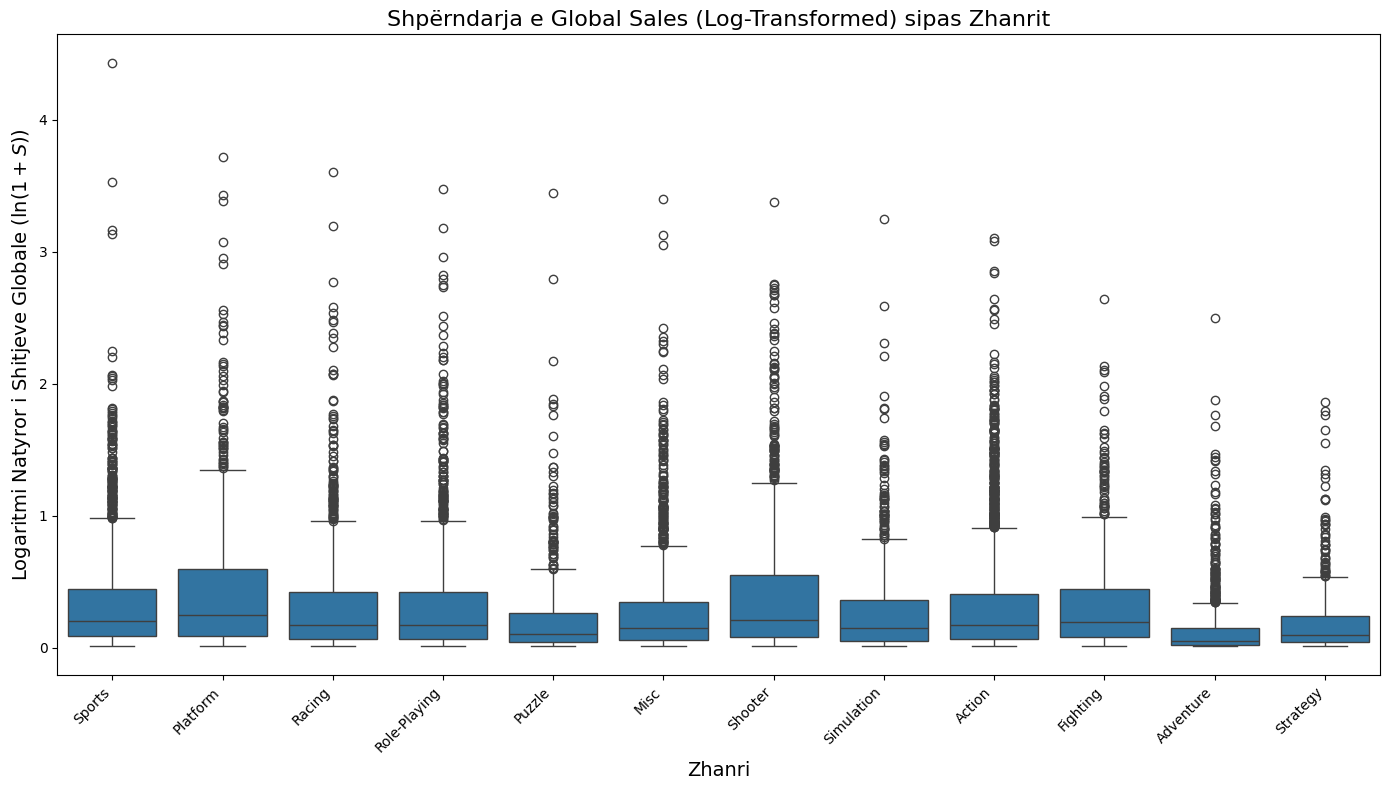

In [30]:
# 6. Boxplot — Distrivutimi i Shitjeve Globale sipas Zhanrit 

df['log_global_sales'] = np.log1p(df['global_sales']) # log(1 + sales)

plt.figure(figsize=(14, 8))
sns.boxplot(x='genre', y='log_global_sales', data=df)
plt.title('Shpërndarja e Global Sales (Log-Transformed) sipas Zhanrit', fontsize=16)
plt.xlabel('Zhanri', fontsize=14)
# Etiketë shkencore për y-axis
plt.ylabel(r'Logaritmi Natyror i Shitjeve Globale ($\ln(1 + S)$)', fontsize=14) 
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Heqim kolonën ndihmëse
df.drop(columns=['log_global_sales'], inplace=True, errors='ignore')

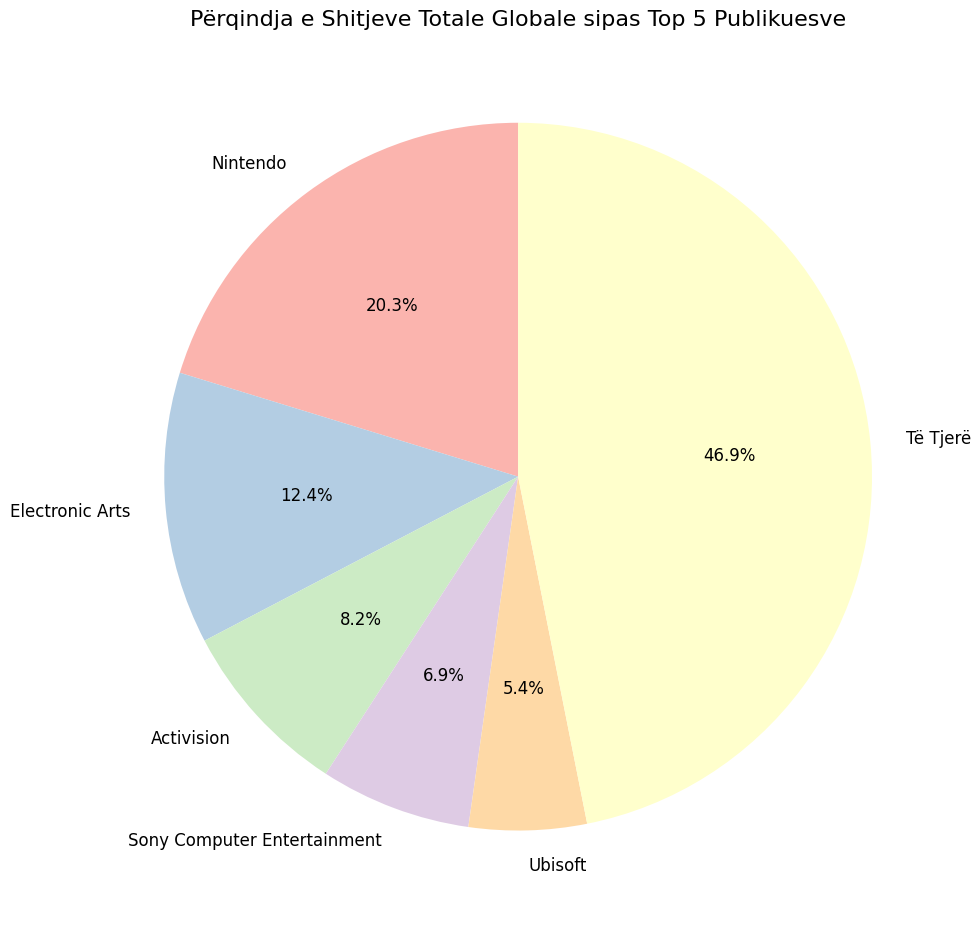

In [44]:
# 7. Pie chart — % e Shitjeve Globale sipas Top 5 Publikuesve

top5_publishers = df.groupby('publisher')['global_sales'].sum().nlargest(5)
other_sales = df['global_sales'].sum() - top5_publishers.sum()

pie_data = pd.concat([top5_publishers, pd.Series([other_sales], index=['Të Tjerë'])])

plt.figure(figsize=(10, 10))
plt.pie(pie_data, labels=pie_data.index, 
        autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette("Pastel1", len(pie_data)),
        textprops={'fontsize': 12})

plt.title('Përqindja e Shitjeve Totale Globale sipas Top 5 Publikuesve', fontsize=16)
plt.tight_layout()
plt.show()